 # T2 DIMENSIONALITY REDUCTION

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# EXAMPLE 1: 2D Random Data

This is an example developed by my teacher, Valle Varo, where she explains to us how to code PCA (Principal Component Analysis). 

Annotations for code explanations are done by me.

1. Generate synthetic data

In [3]:
# Define the angle in radians for rotation (pi/5 radians, which is 36 degrees)
angle = np.pi / 5 # * Essentially rotates the data points counterclockwise

# * Set the stretch factor for the x-axis (stretching by a factor of 5)
stretch = 5

# * Define the number of data points to generate (200 data points)
m = 200

In [4]:
# Set a random seed for reproducibility
np.random.seed(3) # * Same random generated numbers to replicate 

# Generate random data points with dimensions 'm' by 2, scaled down by 10
# ? - The numbers generated with mean 0 and sd 1 so pick and choose. /10 narrows it down pretty well. 
X = np.random.randn(m, 2) / 10 

# Stretch the data points along the x-axis by a factor of 'stretch'
# ? - We're effectively proceeding to do the dot product
# ? - We're multiplying the x-coordinates by a stretch factor of 5, while the y-coordinates remain unchanged. 
X = X.dot(np.array([[stretch, 0], [0, 1]]))  # stretch

# ? - Rotate the stretched data points counterclockwise by an 'angle' (in radians)
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])  # rotate

In [5]:
 # ? - We're ensuring mean 0, and s.d 1 after the transformation of the dataset.
X_std = StandardScaler().fit_transform(X)
# ? - Calculates the mean of each column across all samples. From the results we confirm std. dataset.
np.mean(X_std, axis=0)

array([-1.77635684e-17, -8.60422844e-18])

In [6]:
X_std.shape

(200, 2)

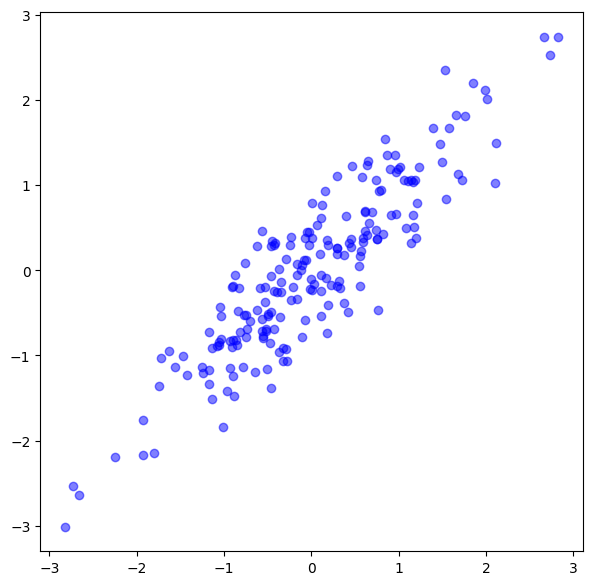

In [7]:
# Plot blue circles at the data points in 'X' with a slight transparency (alpha=0.5)
plt.figure(figsize=(7, 7))
plt.plot(X_std[:, 0], X_std[:, 1], "bo", alpha=0.5)
plt.show()

![Alt text](image.png)

In [8]:
 # ? - Compute the covariance matrix using numpy. Original formula is: 
# * cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1) as seen above.
cov_mat = np.cov(X_std.T)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00502513 0.90575658]
 [0.90575658 1.00502513]]


As we know from PCA, when we wish to reduce the dimensionality of our dataset, we must multiply our matrix X of dimension D, by W of dimension L, to obtain the latent vectors. 

From class, we've determined that W are the eigenvectors of the empirical covariance matrix. Which is exactly what we're extracting from the code below. 

**Reminder:** Eigenvectors are orthogonal aka independent from each other. 

In [9]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues 
[0.09926855 1.9107817 ]


In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
# ? - For each eigenvalue, create a tuple which pairs each eigenvalue, with its corresponding eigenvector. 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
# ? - As we know that W, has the eigenvectors in order, we must sort them
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.9107817040282047
0.09926854722807799


**So what's the following process?** 

* We sum our eigen values - Each eigenvalue represents the variance of each principal component. By adding them up, we get the total variance of the dataset. 
  
* We then calculate the _explained variance ratio_ for each principal component. We iterate in descending order, and obtain the proportion of variance explained by each principal component.
  
* We then calculate the cumulative variance, to see the build-up of variance. 

In [11]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# ? - Here we can observe that the first eigenvector explains 95% and the second 5%
print(var_exp)

[95.06138977540313, 4.938610224596877]


## Projection onto Eigenvectors

In [12]:
u1 = eig_vecs[0]
u2 = eig_vecs[1]

In [13]:
 # ? - If we remember, we determined that Z ended up being the projection of X, on W. Whose eigenvectors we've just determined. 
# * So here we are determining the projection of the standardised dataset for each eigenvec. 
X_proj1 = X_std.dot(u1.reshape(-1, 1))
X_proj2 = X_std.dot(u2.reshape(-1, 1))

The following code generates a plot to visualize the projection of 'X_std' onto the principal components ('u1' and 'u2') obtained from PCA.  

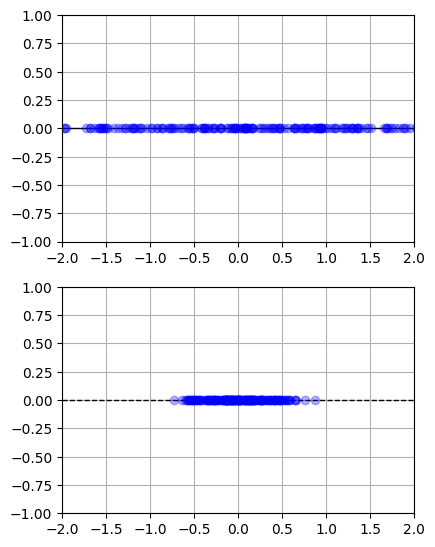

In [14]:
plt.figure(figsize=(10, 10))
plt.subplot2grid((3, 2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3, 2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.axis([-2, 2, -1, 1])
plt.grid(True)

Here we're going to visualise the standardised dataset 'X_std' in its original feature space, along with the eigenvectors ('u1' and 'u2') obtained from the PCA. 

The arrows point to the direction that explain the most variance & thus information.

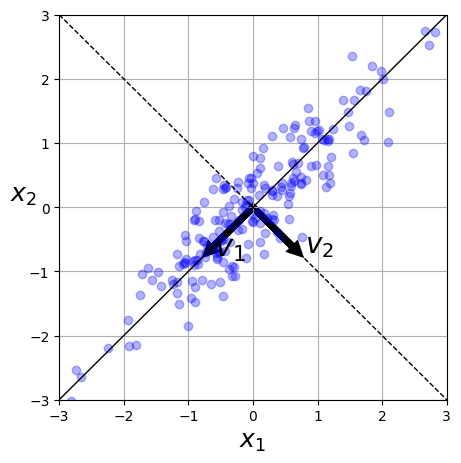

In [15]:
plt.figure(figsize=(5, 5))
plt.plot(X_std[:, 0], X_std[:, 1], "bo", alpha=0.3)
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc="k", ec="k")
plt.arrow(0, 0, u2[0], u2[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc="k", ec="k")
plt.plot([-4, 4], [-4 * u1[1] / u1[0], 4 * u1[1] / u1[0]], "k-", linewidth=1)
plt.plot([-4, 4], [-4 * u2[1] / u2[0], 4 * u2[1] / u2[0]], "k--", linewidth=1)
plt.grid(True)
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$v_1$", fontsize=22)
plt.text(u2[0] + 0.1, u2[1], r"$v_2$", fontsize=20)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
# Set the axis limits for the plot
plt.axis([-3, 3, -3, 3])
plt.show()

In [16]:
z1 = np.dot(X, u1)

In [17]:
z2 = np.dot(X, u2)

After constructing the new matrix with the latent vectors, we observe the new values based on the eigen-vectors. The PCA scores indicate how much each data point contributes to the principal component. 

In [18]:
df = pd.DataFrame({'Z1': z1, 'Z2': z2})

print('PCA Scores for Z1 and Z2 Latent vectors')

df.head(10)

PCA Scores for Z1 and Z2 Latent vectors


,Z1,Z2
0,-0.890132,0.096788
1,-0.018503,0.191603
2,0.142536,0.013343
3,0.050670,0.055456
4,0.029105,0.043707
5,0.635006,-0.190140
6,-0.461977,-0.099918
7,-0.018378,0.043883
8,0.293515,0.110087
9,-0.467912,0.185589


So we haven't really reduced the number of columns, but we can very clearly see, how strong the PCA scores are in Z1 in comparison to Z2. Mission accomplished. 

# EXAMPLE 2: Reconstruction

In [19]:
np.random.seed(42)
# Generate Data
n = 50      # * Number of data points to be generated
var = 3     # * This line defines the variance of each feature. 
corr = .5   # * Desired correlation coefficient. 

In [20]:
 # ? - Construction of the corr matrix. 
cov_mat = [[var, corr * var], [corr * var, var]]
# ? - Generate n data points from a multivariate normal distribution that's centered and with cov_mat. 
X = np.random.multivariate_normal([0, 0], cov_mat, n)

In [21]:
X.shape

(50, 2)

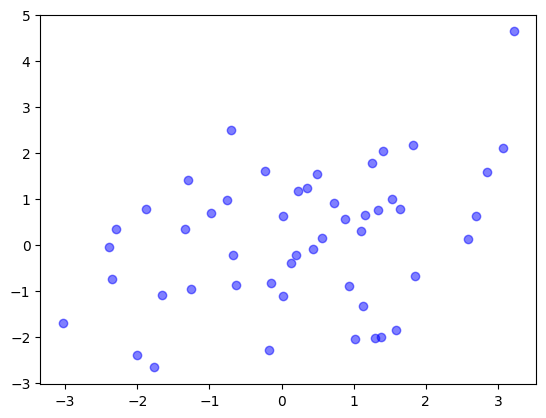

In [22]:
plt.plot(X[:,0], X[:, 1], "bo", alpha=0.5)

In [23]:
X_mean = np.mean(X, axis=0)
X_mean # * We have standardised data. 

array([0.26588235, 0.14114455])

In [24]:
# Project Data onto PCA line
from sklearn.decomposition import PCA
subspace_dim = 1
# ? - We wish to apply PCA such that we stay with a single column.
pca = PCA(subspace_dim)
# ? - We construct and reconstruct in a single line. 
X_reconstr = pca.inverse_transform(pca.fit_transform(X))

In [25]:
X[:5]

array([[-0.62533083, -0.86481163],
       [-2.29051535,  0.34744974],
       [ 0.55399861,  0.14846151],
       [-3.03343719, -1.70420125],
       [ 0.2343408 ,  1.17408236]])

In [26]:
 # ? - As you can see we have reduced the dimensions + the magnitude shift. 
pca.fit_transform(X)[:5]

array([[-1.3354642 ],
       [-1.7611401 ],
       [ 0.21894896],
       [-3.68638539],
       [ 0.66797933]])

The following code generates a plot to visualize:
* The origianl data points
* Their mean 
* The PCA line 
* The projected points onto the line 
* The projection lines. 

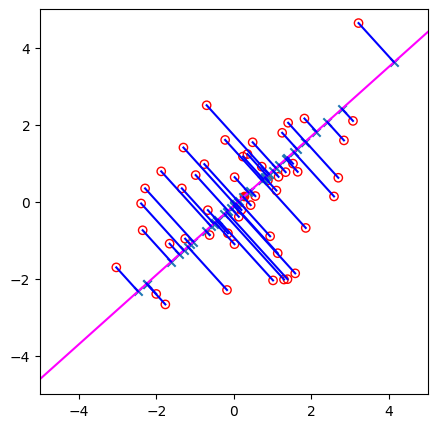

In [27]:
# Create figure and save.
fig, ax = plt.subplots(figsize=(5, 5))

# Plot raw data
ax.scatter(X[:, 0], X[:, 1], marker='o', facecolor='none', edgecolor='red')
X_mean = np.mean(X, axis=0)
ax.scatter(X_mean[0], X_mean[1], facecolor='red')

# Plot PCA line
low_point = X_mean - 10 * pca.components_.reshape(-1)
high_point = X_mean + 10 * pca.components_.reshape(-1)
ax.plot([low_point[0], high_point[0]], [low_point[1], high_point[1]], color='magenta')
ax.set_ylim(-5, 5)
ax.set_xlim(-5, 5)

# Plot projected points
ax.scatter(X_reconstr[:, 0], X_reconstr[:, 1], marker='x')

# Plot projection lines
for (xi1, xi2), (xi1_rec, xi2_rec) in zip(X, X_reconstr):
    ax.plot([xi1, xi1_rec], [xi2, xi2_rec], color='blue')

plt.show()

# Digits PCA

In [28]:
try:
    from tensorflow import keras
except ModuleNotFoundError:
    %pip install -qq tensorflow
    from tensorflow import keras
import tensorflow as tf

In [29]:
# define plots common properties and color constants
plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.linewidth"] = 0.5
GRAY1, GRAY4, GRAY7 = "#231F20", "#646369", "#929497"

Process: 
1. Take the mnist dataset. Split it into train and test. 
2. Normalise the image vector values. 
3. Create an array ndx to select a subset of the training data. 
4. Retrieve the image dimensiones. 
   * nsamples -> Number of images 
   * nrows -> Number of rows per image 
   * ncols -> Number of cols per image
5. np.reshape -> Reshapes the training images from a 3D array to a 2D array. Such that each col of X_train flattens the training dataset. 
6. Select a subset of ndx rows for the training and the labels. 

In [30]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
ndx = np.arange(1000)
nsamples, nrows, ncols = train_images.shape
X_train = np.reshape(train_images, (nsamples, nrows * ncols))
X_train = X_train[ndx, :]
y_train = train_labels[ndx]
w = 30  # 28+2

From the code below we see that we have 1000 rows of 784 features. 
The number 784 is 28 squared. As our pixels are 28 by 28, but are now flattened. 

In [31]:
n_samples, n_features = X_train.shape
print(X_train.shape)
img_size = int(np.sqrt(n_features))

(1000, 784)


So now, we're going to focus on the subset of numbers labeled '3'. 

In [32]:
idx_3 = np.where(y_train == 3)[0]
X_train_3 = X_train[idx_3]

We proceed to apply PCA to the MNIST dataset. Where we wish to reduce from 784 to 2 dimensions. Specifically for the dataset of numbers labeled 3. We then prepare the data for plotting by calculating percentiles for creating a grid. 

**Reminder:** This is NOT for the entire MNIST dataset. 

In [33]:
X_train_3_pca = PCA(n_components=2).fit_transform(X_train_3)

# Calculate percentiles for creating a grid for plotting
x_grid = np.percentile(X_train_3_pca[:, 0], [5, 25, 50, 75, 95])
y_grid = np.percentile(X_train_3_pca[:, 1], [5, 25, 50, 75, 95])

# Set the center of the grid to (0, 0)
x_grid[2], y_grid[2] = 0, 0

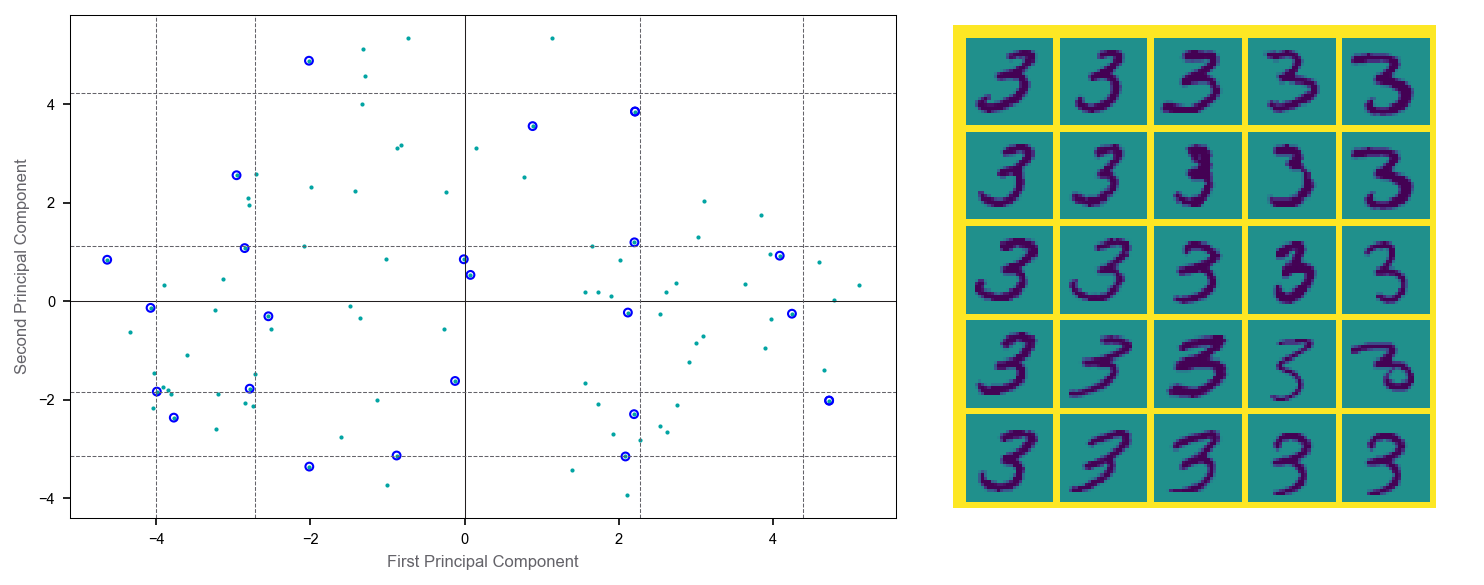

In [34]:
fig, axarr = plt.subplots(
    1, 2, figsize=(10, 4), dpi=150, gridspec_kw=dict(width_ratios=[3, 2])
)

plt.subplots_adjust(wspace=0.1)

for s in axarr[1].spines.values():
    s.set_visible(False)

axarr[1].tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)

ax = axarr[0]
# ? - Plot the PCA-transformed data on the first subplot using small dots. 
ax.scatter(X_train_3_pca[:, 0], X_train_3_pca[:, 1], s=1, color="#02A4A3")
ax.set_xlabel("First Principal Component", color=GRAY4, fontsize=8)
ax.set_ylabel("Second Principal Component", color=GRAY4, fontsize=8)

for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(7)

ax.axhline(0, linewidth=0.5, color=GRAY1)
ax.axvline(0, linewidth=0.5, color=GRAY1)

# ? - Draw the separate quartiles for both PCA components
for i in range(5):
    if i != 2:
        ax.axhline(y_grid[i], linewidth=0.5, color=GRAY4, linestyle="--")
        ax.axvline(x_grid[i], linewidth=0.5, color=GRAY4, linestyle="--")

# Create an image representation of the data based on percentiles and plot it on the second subplot
img = np.ones(shape=(4 + w * 5, 4 + w * 5))
for i in range(5):
    for j in range(5):
        v = X_train_3_pca - np.array([x_grid[i], y_grid[j]])
        v = np.sqrt(np.sum(v**2, axis=-1))
        idx = np.argmin(v)
        ax.scatter(
            X_train_3_pca[idx : idx + 1, 0],
            X_train_3_pca[idx : idx + 1, 1],
            s=14,
            facecolors="none",
            edgecolors="b",
            linewidth=1,
        )
        img[j * w + 4 : j * w + 4 + img_size, i * w + 4 : i * w + 4 + img_size] = (
            -X_train_3[idx].reshape((img_size, img_size))
        )

ax = axarr[1]
ax.imshow(img)
ax.set_aspect("equal", "datalim")

plt.tight_layout()
plt.show()

From what I understand, we have now reduce the number of dimensions of 3's from 784 to 2. Meaning that now, each '3' has PCA scores which we have plotted on that graph. Each with it's corresponding percentile on both the x and y axis. 

**Proceeding steps with the graph:**
1. Plot the PCA-transformed data on the first subplot using small dots. 
2. The blue circles represent specific data points from the digit '3' images dataset after PCA transformation. These are the ones chosen to represent the closest data point to each of the percentil grid intersections. 
   * For each intersection point defined by the percentile values of PCA components, we calculate the distance from every point in the PCA-dataset to that intersection. 
   * The closest point to that intersection is then marked with a circle. 
   * The further the distance, the higher the variance. 

# Choosing the number of latent dimensions.

In [35]:
try:
    from sklearn.decomposition import PCA
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal

In [36]:
try:
    from tensorflow import keras
except ModuleNotFoundError:
    %pip install -qq tensorflow
    from tensorflow import keras
import warnings
from sklearn.metrics import mean_squared_error

In [37]:
warnings.simplefilter("ignore", RuntimeWarning)  # for some NaN values

In [38]:

# Standard mnist dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images[train_labels == 3]  # select images of digit '3'

1. Get the sample of mnist dataset rows. 
2. Select the number 3 rows & flatten them like a pancake. 
3. Split into test and train, which for some reason you've taken them and done it over the train dataset. 

In [39]:
n_images = 1000
train_images = train_images[0:n_images, :, :]
n_samples, n_rows, n_cols = train_images.shape
X = np.reshape(train_images, (n_samples, n_rows * n_cols))

X_train = X[0 : int(n_images / 2), :]  # 500 images in train set
X_test = X[int(n_images / 2) :, :]  # 500 images in test set

PCA - Setup 

In [40]:
# Reconstruction error on MNIST vs number of latent dimensions used by PCA
# * This is dimension D
X_rank = np.linalg.matrix_rank(X_train) 

# * We generate an array which ranges from 1 to 0.75*D to extract the K's to test out. 
K_linspace = np.linspace(1, 0.75 * X_rank, 10, dtype=int) 
# * Generate the K's vector - To test out for the optimal L. 
Ks = np.unique(np.append([1, 5, 10, 20], K_linspace))

# ? - Vectors which are intended to store the RMSE values for train and test datasets.
RMSE_train = np.arange(len(Ks))
RMSE_test = np.arange(len(Ks))

In [41]:

# * For each L which we want to test out perform a PCA and it's corresponding reconstruction 
# * Both for the train & test datasets - Then for that specific L, log what the RMS error is in order to plot it. 
for index, K in enumerate(Ks):
    pca = PCA(n_components=K)

    Xtrain_transformed = pca.fit_transform(X_train)
    Xtrain_proj = pca.inverse_transform(Xtrain_transformed)
    RMSE_train[index] = mean_squared_error(X_train, Xtrain_proj, squared=False)

    Xtest_transformed = pca.transform(X_test)
    Xtest_proj = pca.inverse_transform(Xtest_transformed)
    RMSE_test[index] = mean_squared_error(X_test, Xtest_proj, squared=False)

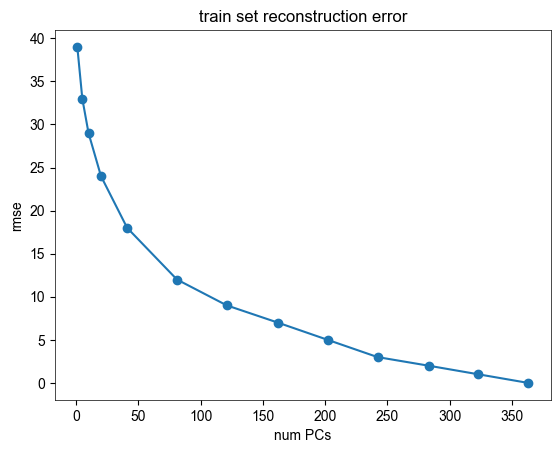

In [42]:
fig, ax = plt.subplots()
xs = Ks
ys = RMSE_train
plt.title("train set reconstruction error")
plt.xlabel("num PCs")
plt.ylabel("rmse")
ax.plot(xs, ys, marker="o")
plt.show()

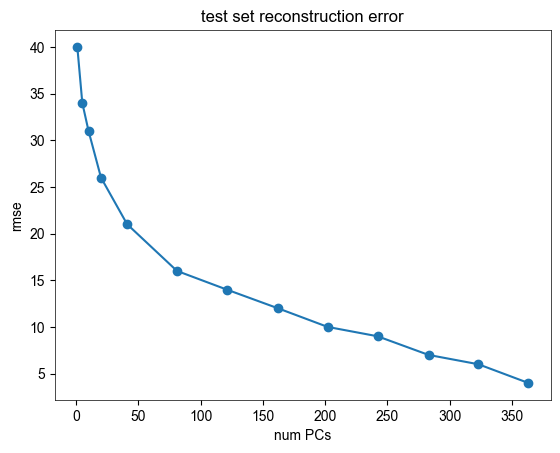

In [43]:
fig, ax = plt.subplots()
xs = Ks
ys = RMSE_test
plt.title("test set reconstruction error")
plt.xlabel("num PCs")
plt.ylabel("rmse")
ax.plot(xs, ys, marker="o")
plt.show()

In [44]:
# * Fraction of variance explained
pca = PCA(n_components=X_rank)
# ? - This is part of the Scree Plot which is mentioned in the slides.  
X_transformed = pca.fit_transform(X_train)
evals = pca.explained_variance_  # eigenvalues in descending order
# ? - We're limite the number of dimensions to 50 as a maximum
fraction_var = np.cumsum(evals[0:50] / np.sum(evals))

In [45]:
xs = np.arange(1, 51)
ys = evals[0:50]
xs.shape, ys.shape, evals.shape

((50,), (50,), (485,))

So to avoid confusion, this is what the screeplot is showing on the graph: 

As we understand, when performing PCA, our W matrix - contains the L eigenvectors of the empirical correlation matrix in descending order. What this means is that the higher the number of dimensions L, the smaller the additional variance explained will be by adding another Principal Component. 

By every extra PC added, we get a law of diminishing return. So what we wish to observe with the scree plot, is at what point is the diminishing return no longer worth it?

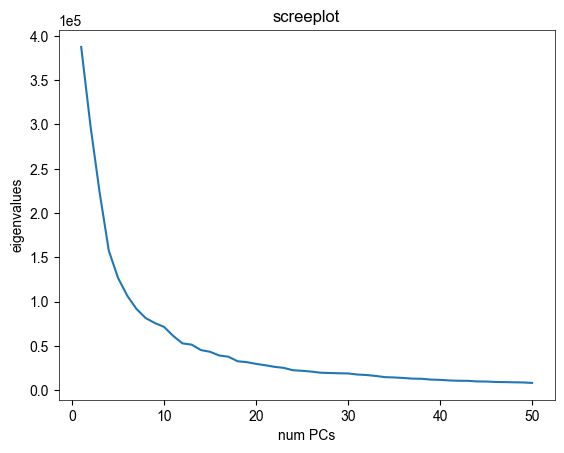

In [46]:
fig, ax = plt.subplots()
xs = np.arange(1, 51)
ys = evals[0:50]
plt.title("screeplot")
plt.xlabel("num PCs")
plt.ylabel("eigenvalues")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
ax.plot(xs, ys)
plt.show()

Careful to compare the proportion of variance explained, compared to the cumulative sum of variance, they are not the same. One is a lot smoother than the other. 

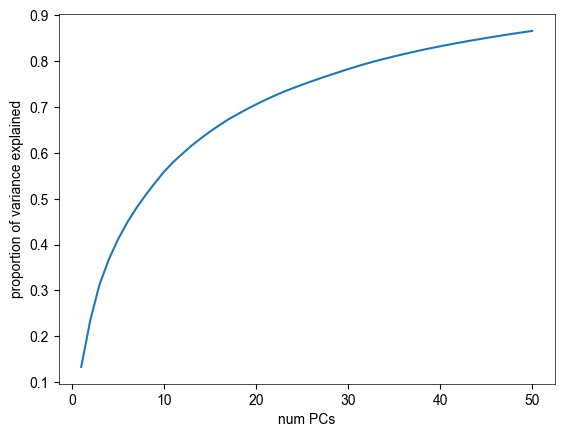

In [47]:
fig, ax = plt.subplots()
xs = np.arange(1, 51)
ys = fraction_var
plt.xlabel("num PCs")
plt.ylabel("proportion of variance explained")
ax.plot(xs, ys)
plt.show()

### Profile Likelihood: 
* This is where we split the eigenvalues of L into two groups: 
  * Those larger than  L*
  * Those lower than the L* 
* To measure L*'s quality we use a change point model. 
* Both groups will be have an eigenvalue decided on a Normal Distribution. 
  * Mean will be the average of all eigenvals in that set.
  * Variance must remain constant to prevent overfitting. 
* Calculate the pooled variance estimate and we evaluate the profile log likelihood. 
* Once that is doen, plot the above equation and take its **maximum value**. 

In [48]:
 # * Profile Likelihood
def log_likelihood(evals):
    Lmax = len(evals)
    ll = np.arange(0.0, Lmax)

    for L in range(Lmax):

        group1 = evals[0 : L + 1]  # Divide Eigenvalues in two groups
        group2 = evals[L + 1 : Lmax]

        mu1 = np.mean(group1)
        mu2 = np.mean(group2)

        # eqn (20.30)
        sigma = (np.sum((group1 - mu1) ** 2) + np.sum((group2 - mu2) ** 2)) / Lmax

        ll_group1 = np.sum(multivariate_normal.logpdf(group1, mu1, sigma))
        ll_group2 = np.sum(multivariate_normal.logpdf(group2, mu2, sigma))

        ll[L] = ll_group1 + ll_group2  
    return ll

In [49]:
ll = log_likelihood(evals) # * Insert all of the corresponding eigenvalues. 

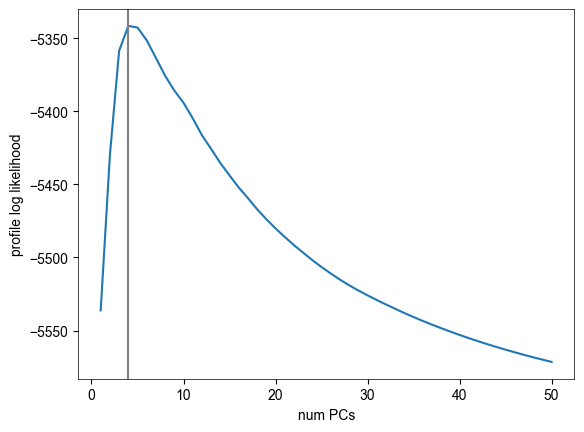

In [50]:
fig, ax = plt.subplots()
xs = np.arange(1, 51)
ys = ll[0:50]

plt.xlabel("num PCs")
plt.ylabel("profile log likelihood")
plt.plot(xs, ys)
idx = np.argmax(ys)
plt.axvline(xs[idx], c='grey')
plt.show()